In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("students.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [22]:
# Step 3: Select relevant columns
features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores"]
target = "Exam_Score"

X = df[features]
y = df[target]


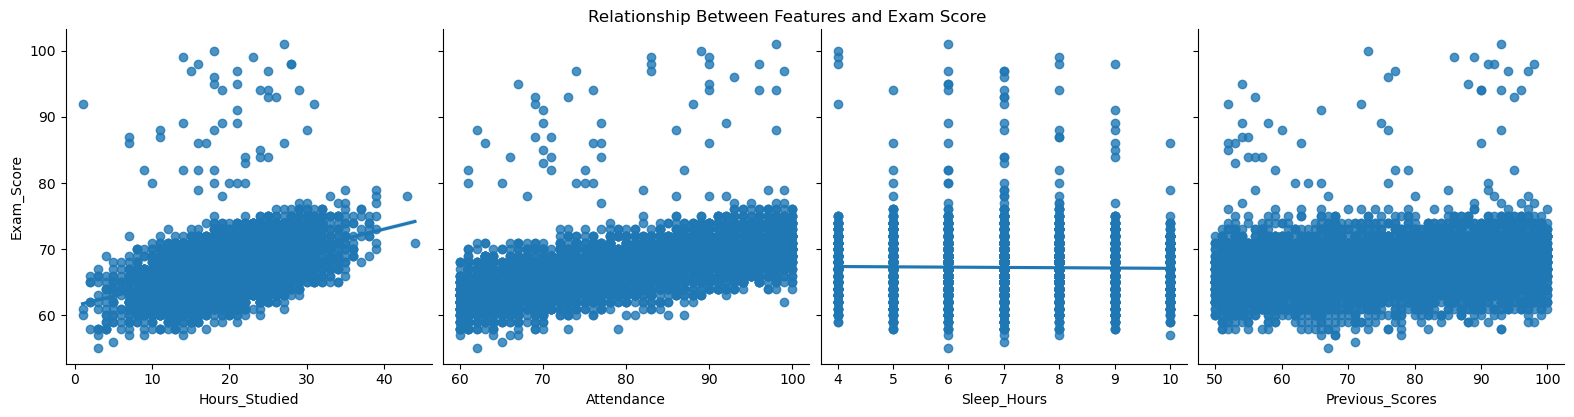

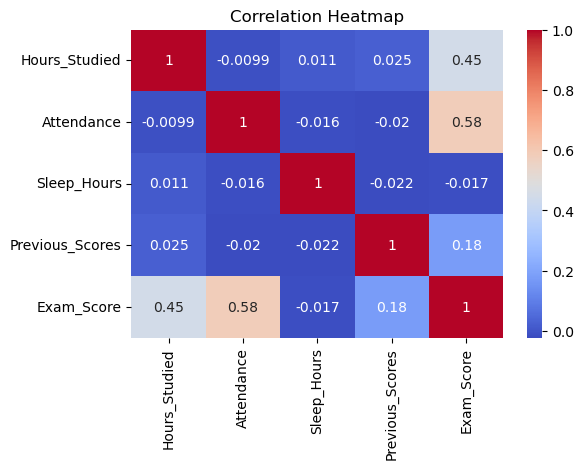

In [23]:
# Step 4: Explore relationships
sns.pairplot(df, x_vars=features, y_vars="Exam_Score", kind="reg", height=4)
plt.suptitle("Relationship Between Features and Exam Score", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 4.28
Mean Absolute Error: 1.02
R² Score: 0.69


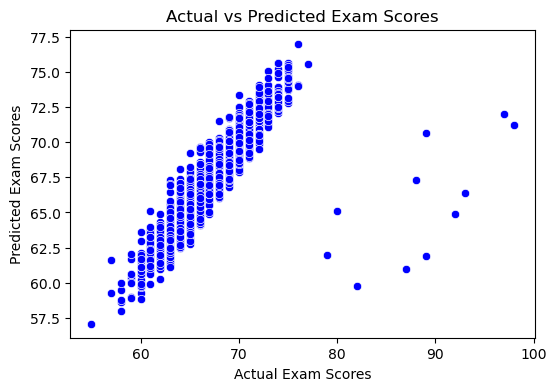

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


In [21]:

from sklearn.preprocessing import StandardScaler

# Create and fit the scaler on training data
scaler = StandardScaler()
new_student = pd.DataFrame([{
    'Hours_Studied': 22,
    'Attendance': 85,
    'Parental_Involvement': 'Medium',
    'Access_to_Resources': 'High',
    'Extracurricular_Activities': 'Yes',
    'Sleep_Hours': 7,
    'Previous_Scores': 75,
    'Motivation_Level': 'Medium',
    'Internet_Access': 'Yes',
    'Tutoring_Sessions': 1,
    'Family_Income': 'Medium',
    'Teacher_Quality': 'High',
    'School_Type': 'Public',
    'Peer_Influence': 'Positive',
    'Physical_Activity': 3,
    'Learning_Disabilities': 'No',
    'Parental_Education_Level': 'College',
    'Distance_from_Home': 'Moderate',
    'Gender': 'Male'
}])

# Encode and scale new data the same way
for col in categorical_cols:
    new_student[col] = le.fit_transform(new_student[col])

new_student_scaled = scaler.transform(new_student)

predicted_score = model.predict(new_student_scaled)
print(f"Predicted Exam Score: {predicted_score[0]:.2f}")


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.